In [877]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn import metrics

%matplotlib inline

# Load the Data

In [880]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_logistic.csv") # Using the cleaned dataset from the EDA stage, retaining the position columns.

In [882]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Preprocess the Data

In [885]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [887]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [889]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [891]:
# Loop through all categorical features and print the value counts for each
for i in categorical_features:
    print (df[i].value_counts())

team
Al-Batin FC             35
Swallows FC             35
Maritzburg United FC    35
Incheon United          34
FC Seoul                34
                        ..
Crystal Palace           2
Villarreal CF            2
Inter Milan              2
FC Barcelona             2
Leicester City           2
Name: count, Length: 356, dtype: int64
position
Defender Centre-Back          1061
Goalkeeper                     788
midfield-CentralMidfield       603
midfield-DefensiveMidfield     539
Defender Right-Back            524
Defender Left-Back             498
Attack Centre-Forward          456
midfield-AttackingMidfield     351
Attack-RightWinger             346
Attack-LeftWinger              299
midfield-RightMidfield          61
midfield-LeftMidfield           58
midfield                        57
Attack                          38
Defender                        30
Attack-SecondStriker            26
Name: count, dtype: int64


In [893]:
# Get the counts of each category in 'team'
team_counts = df['team'].value_counts()  
# Keep only rows where the 'team' count is greater than or equal to 2
df = df[df['team'].isin(team_counts[team_counts >= 2].index)]  

In [895]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [897]:
df.shape

(5735, 387)

In [899]:
# X features without 'current_value' as it is the target value
X = df.drop(['current_value'], axis=1) 

# Define three classes based on quantiles
Classes = [
    (df['current_value'] <= df['current_value'].quantile(0.33)),  # Lower than 33rd percentile
    (df['current_value'] > df['current_value'].quantile(0.33)) & (df['current_value'] <= df['current_value'].quantile(0.66)),  # Medium: Between 33rd and 66th percentile
    (df['current_value'] > df['current_value'].quantile(0.66))  # Higher than 66th percentile
]

labels = [0, 1, 2]

y = np.select(Classes, labels)

In [901]:
class_counts = pd.Series(y).value_counts()

# Display the counts for each class
print(class_counts)

0    2190
2    1826
1    1719
Name: count, dtype: int64


In [902]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Decision Tree

In [906]:
model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree

In [911]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

# Test Decision Tree model

In [914]:
y_pred = model.predict(X_test_scaled)

# Evaluating Decision Tree Model 

In [917]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8186573670444638

In [919]:
# Comparing to logistic regression, the decision tree improved the accuracy by 8%, 
# where logistic regression achieved an accuracy of 0.73 and the decision tree achieved 0.81.

In [921]:
precision = precision_score(y_test, y_pred, average='micro')
precision

0.8186573670444638

In [923]:
# Using precision to evaluate the accuracy of positive predictions.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [925]:
recall = recall_score(y_test, y_pred, average='micro')
recall

0.8186573670444638

In [927]:
# Using recall to evaluate the model's ability to correctly identify positive instances.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [929]:
F1 = f1_score(y_test, y_pred, average='micro')
F1

0.8186573670444638

In [931]:
# Using F1 score to evaluate the balance between precision and recall for positive predictions.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [933]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[374,  57,   2],
       [ 46, 258,  53],
       [  6,  44, 307]], dtype=int64)

In [935]:
# These are the misclassifications. For example:
#57 instances of class 0 were misclassified as class 1.
#46 instances of class 1 were misclassified as class 0.
#44 instances of class 2 were misclassified as class 1, and so on.
# We can observe that the classes with the most misclassifications are similar to those in logistic regression.

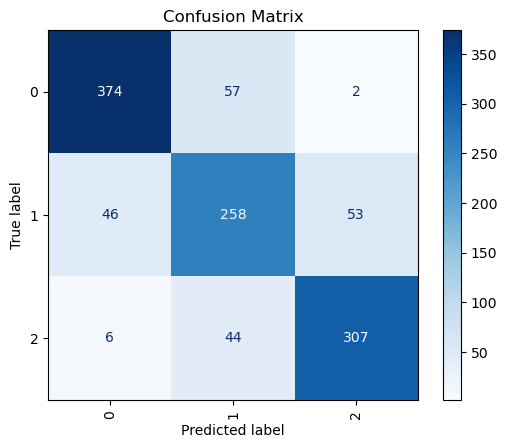

In [937]:
# Heatmap for the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [939]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       433
           1       0.72      0.72      0.72       357
           2       0.85      0.86      0.85       357

    accuracy                           0.82      1147
   macro avg       0.81      0.82      0.82      1147
weighted avg       0.82      0.82      0.82      1147



In [970]:
# Class 1 has the lowest precision, recall, and F1-score, indicating that the model has difficulty recognizing it

# Build the Random Forest

In [944]:
model2 = RandomForestClassifier(random_state=42)

# Train the Random Forest

In [947]:
model2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Test Random Forest model

In [949]:
y_pred = model2.predict(X_test_scaled)

# Evaluating Random Forest Model 

In [952]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8221447253705318

In [954]:
# Accuracy using the random forest increased by 1%.
#Precision,  recall and, F1 score also increased by 1%.

In [956]:
precision = precision_score(y_test, y_pred, average='micro')
precision

0.8221447253705318

In [958]:
recall = recall_score(y_test, y_pred, average='micro')
recall

0.8221447253705318

In [960]:
F1 = f1_score(y_test, y_pred, average='micro')
F1

0.8221447253705318

In [962]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[357,  63,  13],
       [ 28, 255,  74],
       [  2,  24, 331]], dtype=int64)

In [964]:
# Misclassifications decreased in some classes and increased in others.

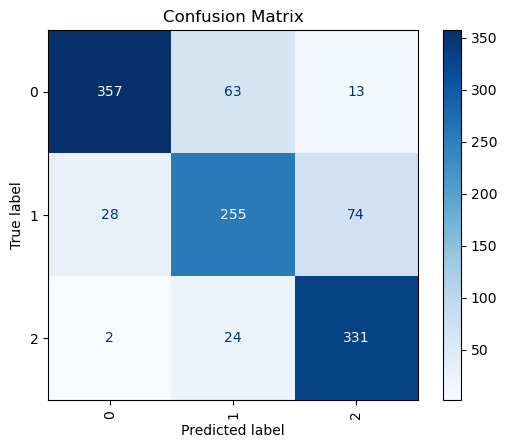

In [966]:
# Heatmap for the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [968]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       433
           1       0.75      0.71      0.73       357
           2       0.79      0.93      0.85       357

    accuracy                           0.82      1147
   macro avg       0.82      0.82      0.82      1147
weighted avg       0.83      0.82      0.82      1147

